В представленной лабораторной работе рассмотрим первичный анализ данных, предобработка и решение задачи классификации с помощью простейшего алгоритма машинного обучения kNN на примере реальных наблюдений о 537 577 сделках, совершенных в __Черную пятницу__ в розничных магазинах. Данные содержат атрибуты, описанные в таблице:

| Название колонки | Краткое описание |
|---|---|
| User_ID |Идентификатор покупателя |
| Product_ID | Идентификатор сделки |
| Gender | Пол |
| Age | Возрастной диапазон |
| Occupation | Время совершения сделки |
| City_Category | Категория города (A,B,C) |
| Stay_In_Current_City_Years | Количество прожитых в городе лет |
| Marital_Status | Семейное положение |
| Product_Category_1 / Product_Category_2 / Product_Category_3 | Количество позиций по категориям товара |
| Purchase | Сумма покупки, руб |

# Введение в Machine Learning в Python

Машинное обучение –  класс методов искусственного интеллекта, при помощи которых система обрабатывает большое число примеров, выявляет закономерности и использует их, чтобы прогнозировать характеристики новых данных.

Имеется множество объектов (ситуаций) и множество возможных ответов (откликов, реакций). Существует некоторая зависимость между ответами и объектами, но она неизвестна. Известна только конечная совокупность прецедентов — пар «объект, ответ», называемая обучающей выборкой. На основе этих данных требуется восстановить неявную зависимость, то есть построить алгоритм, способный для любого возможного входного объекта выдать достаточно точный классифицирующий ответ.

## Работа с данными

Построим модель для предсказания возрастной категории в зависимости от суммарной стоимости покупок.

### Необходимые импорты и настройки

Первичный анализ данных будем проводить средствами пакета Pandas - один из ориентированных на данные пакетов python, который значительно упрощает импорт и анализ данных. Pandas построен на популярных библиотеках для работы с числами `numpy` и графиками `matplotlib`, что делает манипуляции с данными и визуализацию более удобными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Чтение данных

На входе у нас есть данные, хранящиеся в файле с расширением *.csv.

Данные из CSV файла можно считать с помощью функции `read_csv`. По умолчанию предполагается, что поля разделены запятыми.

In [2]:
blackFriday_df = pd.read_csv('BlackFriday.csv')

При обработке CSV файла с помощью pandas, получается объект под названием DataFrame, который состоит из строк и столбцов.

In [3]:
type(blackFriday_df)

pandas.core.frame.DataFrame

Для вывода начальных и конечных элементов используются функции `head` и `tail` соответственно.

Посмотрите на считанные данные

In [4]:
blackFriday_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Проанализируйте считанные данные. Для этого можно воспользоваться функцией `describe`

In [5]:
blackFriday_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577,537577,537577,537577.00000,537577,537577,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
unique,NaN,3623,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1858,405380,214690,NaN,226493,189192,NaN,NaN,NaN,NaN,NaN
mean,1.002992e+06,NaN,NaN,NaN,8.08271,NaN,NaN,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,NaN,NaN,NaN,6.52412,NaN,NaN,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,NaN,NaN,NaN,2.00000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,NaN,NaN,NaN,14.00000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12073.000000


### Выбор данных

Не все исходные данные нам понадобятся в будущем, поэтому необходимо отсеять лишние

Оставим только идентификаторы покупателя, сделки, а также пол, возраст и суммарную стоимость покупок для дальнейшего анализа.

In [6]:
blackFriday_df = blackFriday_df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Purchase']]

blackFriday_df.head()

,User_ID,Product_ID,Gender,Age,Purchase
0,1000001,P00069042,F,0-17,8370
1,1000001,P00248942,F,0-17,15200
2,1000001,P00087842,F,0-17,1422
3,1000001,P00085442,F,0-17,1057
4,1000002,P00285442,M,55+,7969


Оцените исходные данные с которыми нужно будет работать (столбец `Age`). Количество уникальных записей можно посмотреть с помощью функции `value_counts`

In [7]:
blackFriday_df['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

## Предобработка данных для обучения

Визуализируем исходные данные

Постройте гистограмму распределения суммы покупок через `plot` с параметром `kind='hist'`

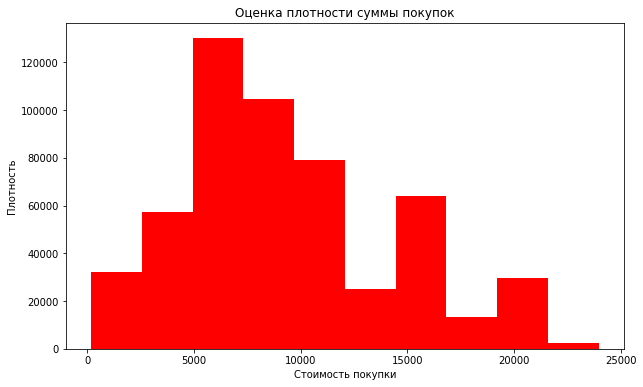

In [9]:
plt.figure(figsize=(10, 6))
blackFriday_df['Purchase'].plot(kind='hist', color='r')
plt.title('Оценка плотности суммы покупок')
plt.xlabel('Стоимость покупки')
plt.ylabel('Плотность')
plt.show()

Далее постройте диаграмму распределения возрастных категорий через `plot` с параметром `kind='bar'`

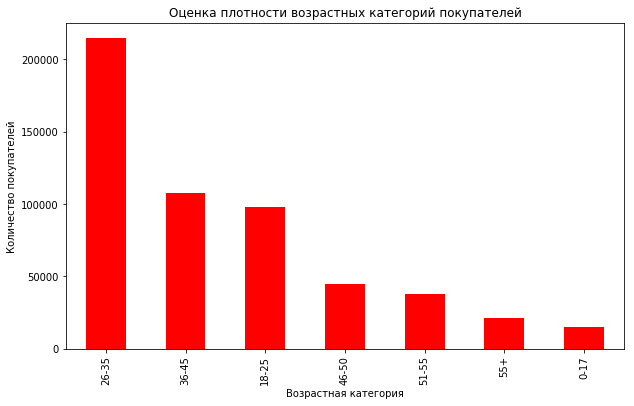

In [10]:
plt.figure(figsize=(10, 6))
blackFriday_df['Age'].value_counts().plot(kind='bar', color='r')
plt.title('Оценка плотности возрастных категорий покупателей')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество покупателей')
plt.show()

Данные для обучении модели классификации должны быть в числовом формате

Необходимо убедиться в том, что исходные данные имеют тип `int` или `float`

In [11]:
blackFriday_df['Age'].dtype

dtype('O')

In [12]:
blackFriday_df['Purchase'].dtype

dtype('int64')

Как можно заметить, данные о возрастной категории представляют из себя строку, поэтому необходимо воспользоваться средствами предобработки исходных данных. Для этого можно использовать `preprocessing` из библиотеки `sklearn`

In [13]:
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()

age_encoded = le.fit_transform(blackFriday_df['Age'])

## Реализация задачи классификации с помощью алгоритма kNN

    Вспомним, что нам необходимо построить модель для предсказания возрастной категории в зависимости от суммарной стоимости покупок.

kNN расшифровывается как k Nearest Neighbor или k Ближайших Соседей — это один из самых простых алгоритмов классификации. Задача классификации в машинном обучении — это задача отнесения объекта к одному из заранее определенных классов на основании его формализованных признаков.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки.
* Отобрать k объектов обучающей выборки, расстояние до которых минимально.
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей.

[Подробнее про аглоритм](https://ru.wikipedia.org/wiki/Метод_k-ближайших_соседей)

### Необходимые импорты и настройки

Библиотека `sklearn` содержит в себе все необходимые для обучения и тестирования моделей методы и функции.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Обучение модели

Создайте модель, реализующую алгоритм kNN с числом соседей 3, используя инструменты библиотеки `sklearn`

In [16]:
model = KNeighborsClassifier(n_neighbors = 3)

Для обучения необходимо загрузить в модель массивы признаков (X) и классов (y). Обратите внимание на тип загружаемых данных – __array__

In [17]:
purchase_encoded = np.asarray(blackFriday_df['Purchase'])

X = purchase_encoded
y = age_encoded

Затем, чтобы собрать тестовую и обучающую выборку из исходных данных, воспользуемся удобной функцией `train_test_split`, реализованной в `scikit-learn`.

Размер тренировочной и тестовой выборок общепринято распределяется в отношении __70% / 30%__

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Затем вызовом функции `fit` обучаем модель

In [19]:
model.fit(X_train.reshape(-1, 1), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Проверка точности предсказания обученной модели

Используем функцию `predict` модели, для того, чтобы предсказать возрастной диапазон по данным о стоимости покупок `X_test`

In [20]:
y_pred = model.predict(X_test.reshape(-1, 1))

Для проверки точности можно использовать функцию `metrics`

In [21]:
print(f"Точность: {int(round(metrics.accuracy_score(y_test, y_pred)*100))}%")

Точность: 27%


Попробуйте самостоятельно повысить точность предсказания

### Домашнее задание



Проанализируйте данные о возрасте и физ. характеристиках молюсков, используя [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data)

| Оригинальная колонка | Название колонки |
|---|---|
| M |sex |
| x0.455 | length |
| x0.365 | diameter |
| x0.095 | height |
| x0.514 | whole_weight |
| x0.2245 | shucked_weight |
| x0.101 | viscera_weight |
| x0.15 | shell_weight |
| x15 | rings |

Попробуйте самостоятельно обучить модель предсказывать зависимости между следующими характеристиками на Ваш выбор:

* Диаметр
* Высота
* Полный вес

## Заключение

kNN — один из простейших алгоритмов классификации, поэтому на реальных задачах он зачастую оказывается неэффективным. Помимо точности классификации, проблемой этого классификатора является скорость классификации: если в обучающей выборке N объектов, в тестовой выборе M объектов, а размерность пространства — K, то количество операций для классификации тестовой выборки может быть оценено как O(K*M*N). И тем не менее, алгоритм работы kNN является хорошим примером для начала знакомства с Machine Learning.